# Step 1: Import all relevant Libraries ~ 5 minutes
* Import __numpy, pandas, scikit-learn, or datascience__ library if you have only taken data8 alongside any addiotional libraries you need for your project.

In [3]:
# General Imports
from datascience import *
import numpy as np
import pandas as pd

# Visualization Imports
import matplotlib.pyplot as plt

# These lines do some fancy plotting magic. Taken from Data 8
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

# Step 2: Find a Dataset and Import it into Datahub ~ 10 minutes
* __[Kaggle](https://www.kaggle.com/)__: good for testing, hold more generic and small scale datasets
* __[data.gov](https://data.gov/)__: good for research, lots of data

Both good for personal projects - __there are DEFINITELY more sources of data that you can pull from (API's, Google Trends, etc.)__

How to Import the Data into Datahub:
1. Find a data source on Kaggle, Data.gov, etc. and download it 
2. Click on the browser tab to the left of this current tab to get back to the Datahub Home/Files page __OR__ create a new tab and type in the url: https://datahub.berkeley.edu/
3. Once you are on the Datahub/JupyterHub Home page and see all your files, navigate to where your project files are and click  the "Upload" button on the top right and upload your downloaded data file.
4. Use the code block below and replace the csv file name with the name of your dataset's csv name

In [4]:
# The dataset used in this demo came from this Kaggle Dataset: https://www.kaggle.com/datasets/justinas/nba-players-data
# REPLACE 'all_seasons.csv' with the name of your data file that you uploaded
data = Table.read_table('Electric_Vehicle_Population_Data.csv')
data.show(3)


# Once you have taken Data 100 you will most likely be using the syntax below rather than the one provided above.
# Feel free to uncomment the code below to see how the code results in the same output. 
# data_df = pd.read_csv('all_seasons.csv')
# data_df.head(3)

VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
2C4RC1N71H,Kitsap,Bremerton,WA,98311,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,23,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.30351e+10
2C4RC1N7XL,Stevens,Colville,WA,99114,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,7,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.3066e+10
KNDC3DLCXN,Yakima,Yakima,WA,98908,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not been researched,0,0,14,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.3077e+10


# Step 3: Explore your Data / Do your project ~15-20 mins
Things to investigate/explore:
* Always try to start your project with a question you want to answer! Its great to tie your projects to a purpose, and having a question that drives your work will help you greatly in sharing what you're trying to achieve to others. Also you should document this somewhere so when you try to come back to your project you can understand what you were doing. 
* What data do I have? What do each column represent? 
* How clean is my data? Are there any columns missing a lot of rows?
* What visualizations/summaries can I make to get a better general understanding of my data?
    * Consider creating a Scatter/Box/Line Plots
    * Personal Favorite: Pairplots from the Seaborn Library allow you to see correlations between all of your columns (code provided below)
* Do I have all the data necessary to begin answering my question? If not, try to find more data sources to merge with your current data source 

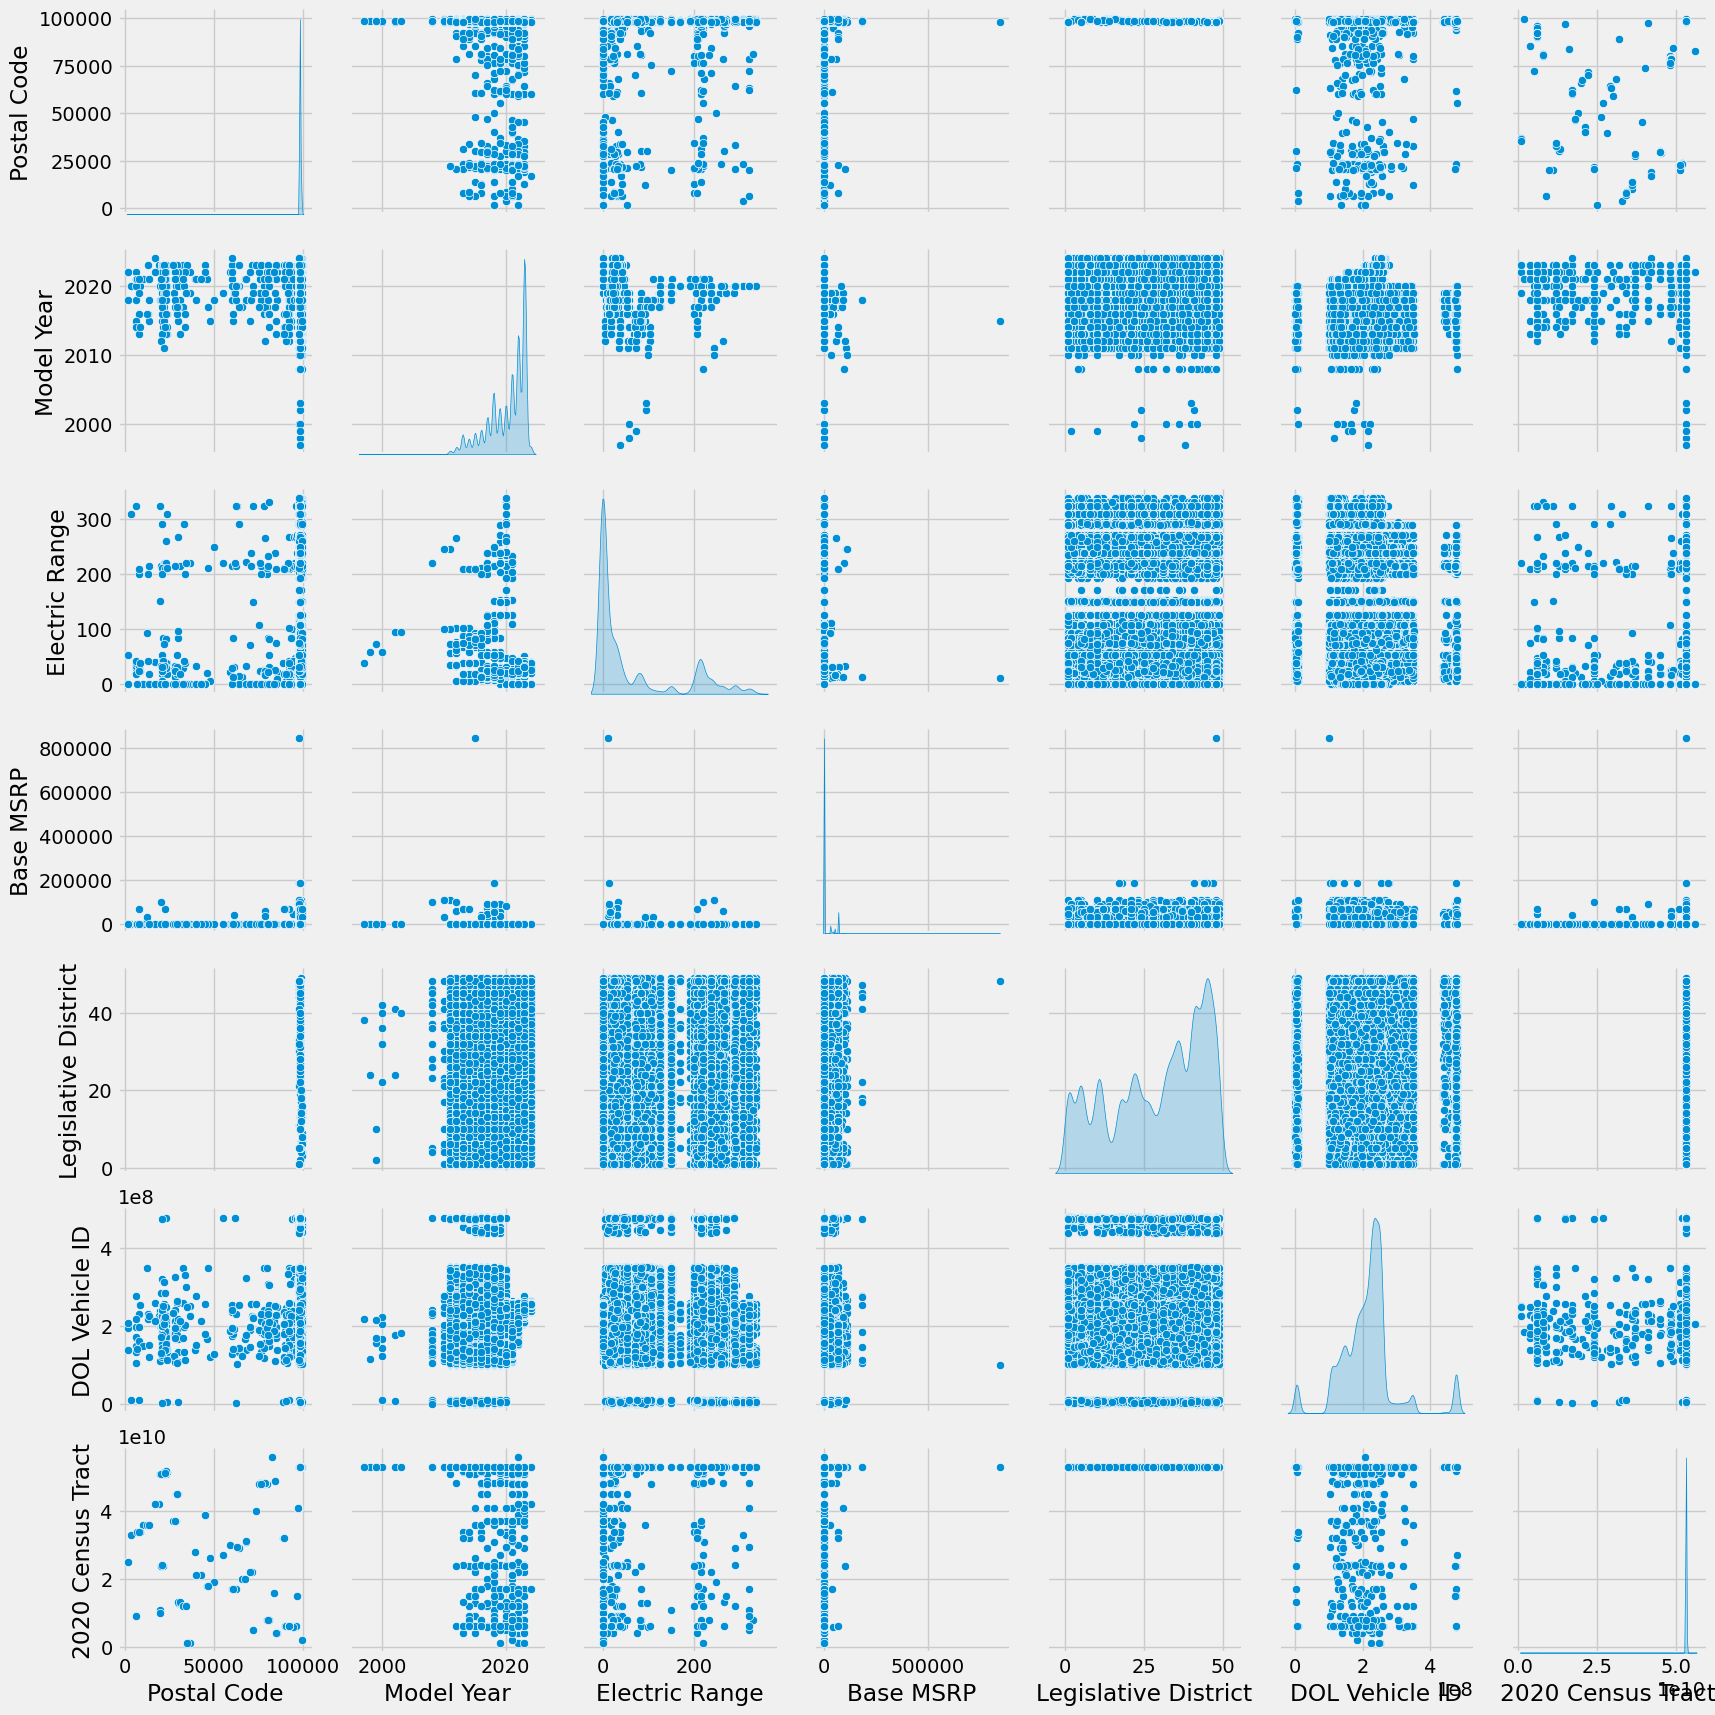

In [5]:
# UNCOMMMENT THE CODE BELOW TO VIEW THE RESULTS OF A PAIRPLOT ON YOUR DATA
data_df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# This code may take a while to run depending on the amount of data that you have
import seaborn as sns
sns.pairplot(data_df, diag_kind='kde')

In [6]:
# Feel free to delete the code in this cell and replace it with your own! 
# The code below is altered from Data 8's Fall 2022 Lab 9 on Linear Regression

# How to see all the columns or labels within your data table
print(data.labels)

# How to calculate the correlation between 2 variables
var1 = 'Electric Range'
var2 = '2020 Census Tract'

var1_mean = np.mean(data.column(var1))
var1_std = np.std(data.column(var1))

var2_mean = np.mean(data.column(var2))
var2_std = np.std(data.column(var2))

data_standard = Table().with_columns(
    (var1 + "(standard units)"), (data.column(var1) - var1_mean) / var1_std,
    (var2 + "(standard units)"), (data.column(var2) - var2_mean) / var2_std)

r = np.mean(data_standard.column(0) * data_standard.column(1))
print("Correlation Between " + var1 + " and " + var2 + ": " + str(r))


('VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract')
Correlation Between Electric Range and 2020 Census Tract: nan


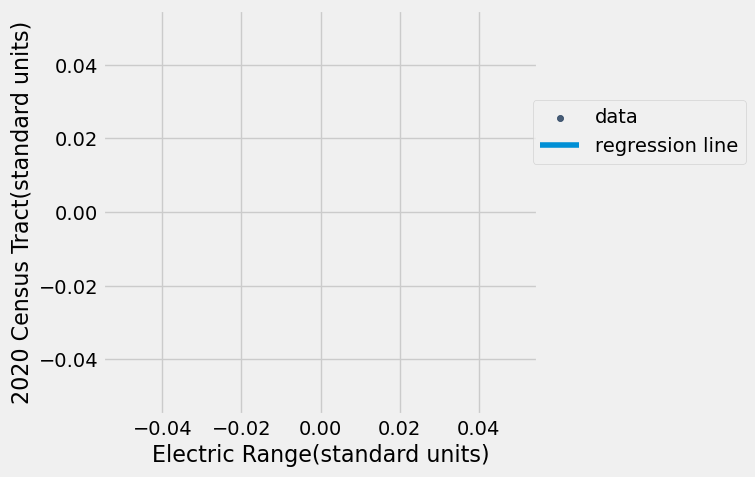

In [7]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points."""
    dataset.scatter(x, y, label="data")
    xs, ys = zip(point_0, point_1)
    plots.plot(xs, ys, label="regression line")
    plots.legend(bbox_to_anchor=(1.5,.8))

plot_data_and_line(data_standard, 
                   (var1 + "(standard units)"), 
                   (var2 + "(standard units)"), 
                   [-2, -2*r], 
                   [2, 2*r])

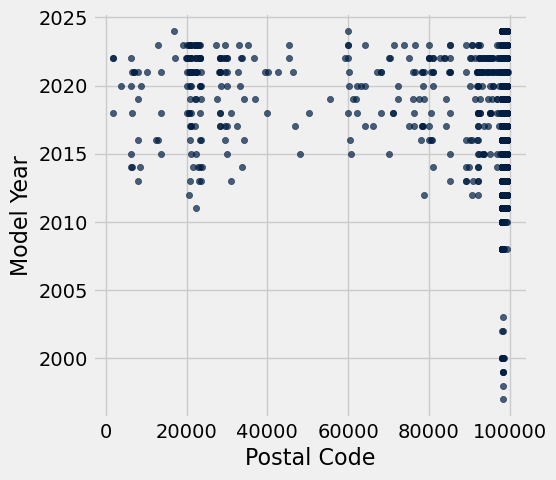

In [8]:
# data_standard.scatter(0, 1)
data.scatter(4, 5)

In [9]:
slope = r / var1_std * var2_std
intercept = var2_mean - slope * var1_mean

def pred_var2(var1):
    return intercept + var1*slope

print(pred_var2(190))

nan


# Step 4: Making your project accessible through Github ~ 10-15 minutes
__1. Create/Login to your github account.__

__2. Create a new Github "Repository" to upload your project files to. Repository can be thought of as a place to store your project files.__
![New Repo](GitHub-Dashboard.png)
__3. Fill out the:__ 
   * __"Repository Name"__ AKA your project name 
   * __"Description"__ (Optional) which should be a short summary of what your project is and its purpose 
   * Choose to make the project __"Public" or "Private"__
   * Choose to include a __README__ file or not (for this demo this is not necessary, but for bigger projects you should learn to create README files that describe what your project is and how to use it) 
   * Choose to include a __.gitignore file__ or a __license__ (for the purpose of this demo, we will ignore these options and keep them at their default but you should look into these 2 if you decide to create public apps on Github)
   * Click the green __"Create Repository"__ button at the bottom right
    
__4. Download your Jupyter Notebook as a .ipynb file.__
   * On the top left of your Jupyter Notebook, click "File", then "Download as", then "Notebook (.ipynb)" 
    
__5. Upload your downloaded project notebook to your Github repository.__
![Adding Files to Repo](Napolo-Sim-DS-Mentors-Demo-Personal-Project.png)
    * Choose your project file to upload, and add a description of what you are uploading, and then press on the green "Commit changes" button to complete your file upload 
![Commiting Project File](Upload-files-·-Napolo-Sim-DS-Mentors-Demo-Personal-Project.png)

# Step 5: Adding your project to your resume ~ 5 minutes
Once you have completed your project and published it to Github, we can now add your project onto your resume! Below is an example of how you can format the link to your project on your resume.

__General Tips:__
* Keep your project/repository names short on Github. This avoids the issue of your project url being too long if you decide to use the format below.
    * If the url is still too long, consider using a url shortener such as __[tinyurl.com](https://tinyurl.com/app)__ to create shortened and personalized url names. 
* Make sure to include the coding language and libraries you used in your project.

![example resume project](ex_resume_proj.png)

# CONGRADULATIONS! YOU HAVE PUBLISHED A PERSONAL PROJECT!
![Congradulations Image](congratulations-image-Google-Search.png)

## You have now successfully created a personal project from scratch and published it publicly for others to view! Hopefully this will allow you explore your Data Science curiosities much easier!

If you have any questions, please feel free to reach out to the Data Science Mentors! We are glad to help!

# Extra Stuff - Full Step by Step Data Science Project Tutorial
If you're interested in implementing a full Data Science Project step by step, feel free to watch this video by __clicking on the image below__ that walks through creating a Housing Price Predictor from Scratch using data from __Kaggle__ and implements modern tools such as __ChatGPT__ to help with completing this project.
[![Watch the video](-3-Beginner-Kaggle-Data-Science-Project-Walk-Through-Housing-Prices-With-ChatGPT-YouTube.png)](https://www.youtube.com/watch?v=NQQ3DRdXAXE)